# Basic classification: Classify images of clothing

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)

2.0.0


## MINST Datenset laden
Das MINST-Datenset ist Bestandteil von Keras und kann mit "keras.datasets.fashion_mnist" heruntergeladen werden.


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Labels Text zuordnen
"train_labels" ist ein nummerischer Wert von 0 - 9. Diesen ordnen wir Texte zu.

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
pd.DataFrame(class_names, columns=["Class"])

Class
0  T-shirt/top
1      Trouser
2     Pullover
3        Dress
4         Coat
5       Sandal
6        Shirt
7      Sneaker
8          Bag
9   Ankle boot

## Explore the Image data
Unser Datenset hat 60,000 Images welche 28x28 Pixel groß sind:

In [6]:
train_images.shape

(60000, 28, 28)

In [8]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

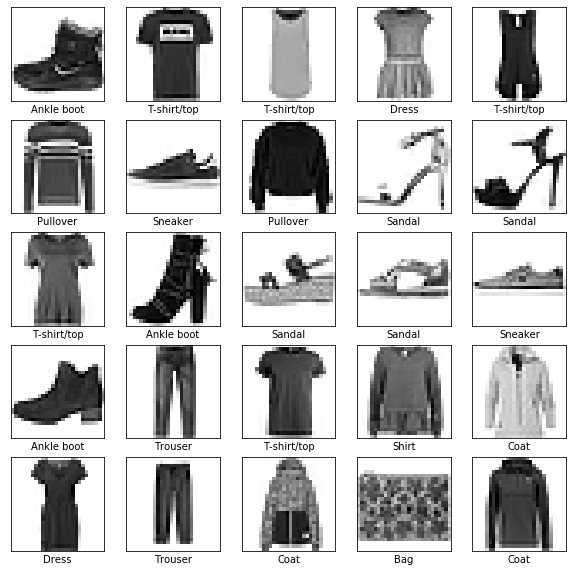

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Keras KNN Layer initalisieren
1. Input Layer
2. Layer 128 Neuronen mit Aktivierungsfunktion "relu"
3. Output-Layer (je einer pro Label)

In [13]:
 model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Training beginnen
60,000 Bilder, 10 Labels, 10 Wiederholungen

In [15]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.4951 - accuracy: 0.8250
Epoch 2/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3689 - accuracy: 0.8667
Epoch 3/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.3332 - accuracy: 0.8784
Epoch 4/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.3093 - accuracy: 0.8869
Epoch 5/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2919 - accuracy: 0.8923
Epoch 6/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2755 - accuracy: 0.8974
Epoch 7/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2653 - accuracy: 0.9010
Epoch 8/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2547 - accuracy: 0.9063
Epoch 9/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2448 - accuracy: 0.9088
Epoch 10/10


## Qualtität mit Hilfe der Testdaten überprüfen

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.2661 - accuracy: 0.8840

Test accuracy: 0.884


In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

## Qualität visualisieren

In [24]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### 99% richtig erkannt

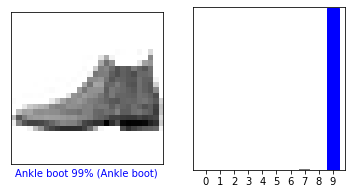

In [28]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

### 51% richtig erkannt, 49 % Sandal fehlerhaft erkannt

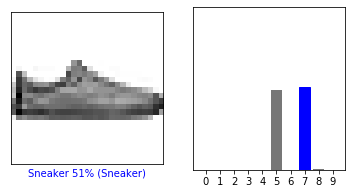

In [34]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

### 49% fehlerhaft erkannt. Coat statt Pullover.

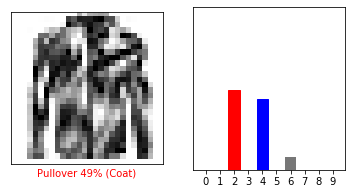

In [35]:
i = 17
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

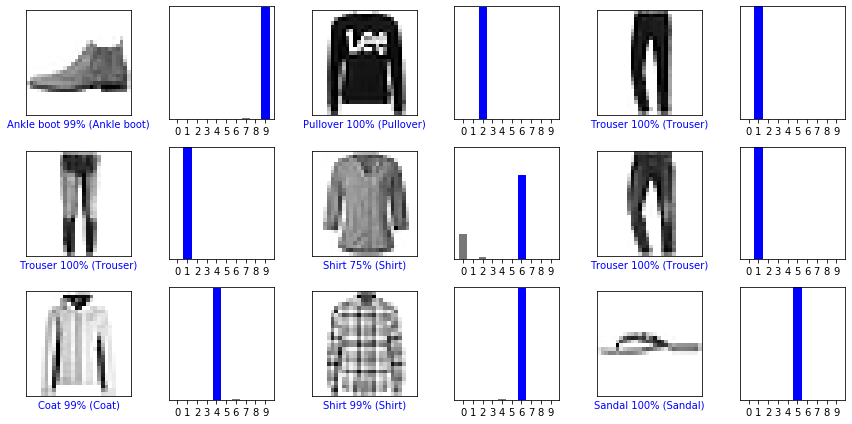

In [37]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()